#Impact

####Preliminaries

We have to import the mathematical functions used in the following. Also, we want to define a function to help with the formatting of our results.

In [1]:
from math import atan2, cos, pi, sin, sqrt
def format(desc, val, units):
    print("%-35s %9g %s"%(desc+":", val, units))

## Data of the problem

The data of our problem is as follows

In [2]:
g  = 10.00
m1 = 75.00
k  = 0.400E6
m2 = m1/3.0
h  = 1.400
format("Acceleration of gravity", g, "m/s^2")
format("Stiffness of suspension system", k, "N/m")
format("Mass of suspended body", m1, "kg")
format("Mass of falling body", m2, "kg")
format("Height of fall", h, "m")

Acceleration of gravity:                   10 m/s^2
Stiffness of suspension system:        400000 N/m
Mass of suspended body:                    75 kg
Mass of falling body:                      25 kg
Height of fall:                           1.4 m


## Solution

### The initial velocity

The potential energy of the falling body is converted to kinetic energy at the moment of impact,
$$m_2gh = \frac12 m_2v_2^2 \Rightarrow v_2 = \sqrt{2gh}$$ 

In [3]:
v2 = sqrt(2*g*h)
format("Impact velocity of fallen body", v2, "m/s.")

Impact velocity of fallen body:        5.2915 m/s.


The initial velocity of the system of mass $m=m_1+m_2$ is given by conservation of momentum,
$$m_2v_2 = mv \Rightarrow v=v_2\frac{m_2}{m}$$

In [4]:
m = m1+m2
v = v2*m2/m
format("Mass of compound system", m, "kg")
format("Initial velocity, compound system", v, "m/s")

Mass of compound system:                  100 kg
Initial velocity, compound system:    1.32288 m/s


###Equation of motion

The equation of motion to be solved is not homegeneous, because we have a static force due to the presence of the fallen body...
$$m\ddot{x}+kx=gm_2$$
and the general integral is hence
$$x(t) = A \cos(\omega t) + B \sin(\omega t) +\frac{gm_2}{k}.$$

In [5]:
w2 = k/m
w  = sqrt(w2)
format("Natural frequency", w, "rad/s")

Natural frequency:                    63.2456 rad/s


#### Initial conditions
The initial conditions are
$$x_0 = 0,\qquad \dot{x}_0 = v_2\frac{m_2}{m},$$
so that we have
$$A\cdot1+B\cdot0+\Delta_{st}=0, \qquad 
  -\omega A\cdot0 + \omega B\cdot1=v,$$ 
that gives
$$A = -\Delta_{st}, \qquad B = \frac{v}{\omega}$$
and eventually
$$x(t) = \Delta_{st}\left(1-\cos(\omega t)\right) + 
\frac{v}{\omega} \sin(\omega t).$$

In [6]:
dst = g*m2/k
A   = -dst
B   = v/w
format("Static displacement", dst*1000, "mm")
format("Cosine coefficient", A*1000, "mm")
format("Sine coefficient", B*1000, "mm")

Static displacement:                    0.625 mm
Cosine coefficient:                    -0.625 mm
Sine coefficient:                     20.9165 mm


###Maximum displacement
The maximum displacement is found considering the response as

\begin{align*}
  x(t) &= \Delta_{st} + C\cos(\omega t-\phi),\quad\text{with } C=\sqrt{A^2+B^2},\\
x_\text{max} &= \Delta_{st}+C\cdot1.\end{align*}

In [7]:
xmx = dst+sqrt(A*A+B*B)
format("Maximum displacement", xmx*1000, "mm")

Maximum displacement:                 21.5508 mm


### Time of maximum displacement

The phase difference is given by the expression
$$\phi=\arctan\frac{B}{A}$$ and we have the maximum displacement when $$\cos(\omega t^* - \phi) = 1,$$ i.e.,
$$\omega t^* - \phi = 2n\pi
\Rightarrow t^* = \frac{\phi+2n\pi}{\omega}=
\frac{\phi}{\omega}+nT_N$$ with $n=-\infty,\ldots,\infty$ and $T_N$ the natural period of vibration of the compound system.

We have to find the smallest positive value of $t^*$ to answer the question of the exercise...

In [8]:
phi = atan2(B, A)
format("Phase difference", phi*180/pi,"deg")

Phase difference:                     91.7115 deg


The phase difference being positive, the smallest positive $t^*$ is simply $$t^*=\frac{\phi}{\omega}.$$

In [9]:
tmx = phi/w
format("Time of first maximum, t*", tmx,"s")

Time of first maximum, t*:          0.0253088 s


Let's verify that the displacement computed at $t^*$ effectively is $x_\text{max}$...

In [10]:
print("*** Verification"," "*24,"***")
format("Maximum displacement", xmx*1000, "mm")
xtmx = dst*(1-cos(tmx*w)) + B*sin(tmx*w) 
format("Displacement @ t*", xtmx*1000, "mm")

*** Verification                          ***
Maximum displacement:                 21.5508 mm
Displacement @ t*:                    21.5508 mm


### Plotting our results

First of all, the period of vibration, we plot one period, then we compute a sequence of
points on the time axis and a sequence of samples of the displacements and one of samples
of the velocities (divided by $\omega$ to have dimensionally and numerically  homogeneous results)

In [11]:
T = 2*pi/w
ts = [i*T/50 for i in range(51)]
x = [dst*(1-cos(w*t))+B*sin(w*t) for t in ts]
v = [dst*sin(w*t)+B*cos(w*t) for t in ts]
t = ts

#### The actual plots

Preparing the required libraries and a few lines of code, using the sequences of data we've just
computed.

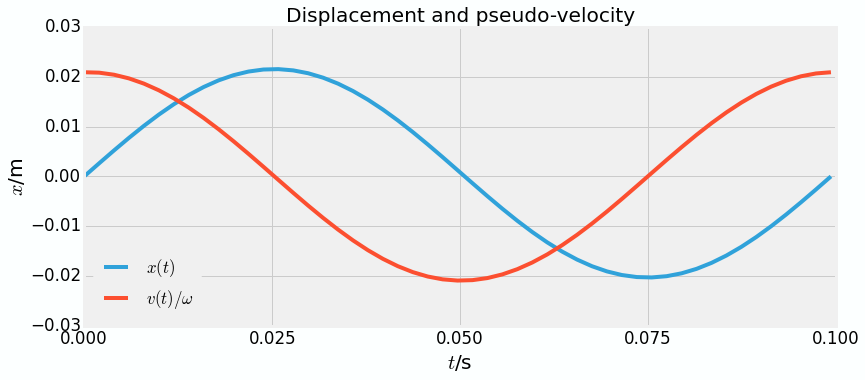

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['fivethirtyeight', './00_mplrc'])

plt.plot(t,x, label="$x(t)$")
plt.plot(t,v, label="$v(t)/\\omega$")
plt.xlabel("$t$/s")
plt.ylabel("$x$/m")
plt.xticks((0,0.025,0.050,0.075,0.100))
plt.legend(loc=0)
plt.title('Displacement and pseudo-velocity')
plt.show()

In [13]:
# incantation to properly format the notebook
from IPython.display import HTML
HTML(open("00_custom.css", "r").read())